In [30]:
#!/usr/local/lib/python3.9

#Libraries
#%conda install matplotlib
#%conda install seaborn

import sys  
#!{sys.executable} -m pip install --user matplotlib==3.4.3
#!pip install matplotlib==3.4.3
# import pkg_resources
# pkg_resources.require("matplotlib==`3.4.3")  # modified to use specific numpy

import pandas as pd
import matplotlib.pyplot  as plot
import matplotlib.ticker as mtick
from functools import reduce
import seaborn as sns
from textwrap import wrap


%matplotlib inline


## Import survey data 
Link to the Mobile Payment & Currency Survey - https://docs.google.com/forms/d/1jP8PFZMUfEO6nppEGKtfeooYeYBipu16hGsrcqCuIg/edit

In [31]:
survey_data = pd.read_csv('/Users/manjaripokala/Documents/Software_Engineering_Masters/Mobile Computing/CourseProject/survey_response.csv')
print(survey_data.shape);

(56, 10)


In [32]:
print(list(survey_data.columns))

['Timestamp', 'Your Mobile OS', 'Do you use mobile payments apps ? (e.g Venmo, Apple pay, Google Pay)', 'What do you believe mobile wallets could replace in the future? (Select all that apply)', 'Do you believe Mobile Wallets is a safer form of transaction ?', 'What concerns you about Mobile Payments ? (Select all that apply)', 'How do you use Mobile Payments ? (Select all that apply)', 'How often do you use Mobile Wallets (transactions per week) ?', 'Do you own crypto currency ?', 'Your Age Group']


## Update columns names to readable names

In [33]:
column_names = {'Timestamp': 'timestamp',
                'Your Mobile OS': 'mobile-os',
                'Do you use mobile payments apps ? (e.g Venmo, Apple pay, Google Pay)': 'payment-apps',
                'What do you believe mobile wallets could replace in the future? (Select all that apply)': 'replace',
                'Do you believe Mobile Wallets is a safer form of transaction ?': 'safer_form',
                'What concerns you about Mobile Payments ? (Select all that apply)': 'concerns',
                'How do you use Mobile Payments ? (Select all that apply)': 'usage',
                'How often do you use Mobile Wallets (transactions per week) ?': 'freqency_per_week',
                'Do you own crypto currency ?': 'crypto',
                'Your Age Group': 'age'
                }
survey_data.rename(columns=column_names, inplace=True)
print(list(survey_data.columns))


['timestamp', 'mobile-os', 'payment-apps', 'replace', 'safer_form', 'concerns', 'usage', 'freqency_per_week', 'crypto', 'age']


## Categorize 'Age'

In [34]:
survey_data['age'].unique()

array(['31-38', '18-22', '23-30', '39-45', '55-60', '46-54', '60-65'],
      dtype=object)

In [35]:
#Group ages function
def age_group (row):
   if row['age'] == '18-22' :
      return 'GenZ'
   if row['age'] == '23-30' :
      return 'Millennials'
   if row['age'] == '31-38' :
      return 'Millennials'
   if row['age'] == '39-45' :
      return 'GenX'
   if row['age'] == '46-54' :
      return 'GenX'
   if row['age'] == '55-60' :
      return 'Boomers'
   if row['age'] == '60-65' :
      return 'Boomers'
   return 'Other'

survey_data['age_category'] = survey_data.apply (lambda row: age_group(row), axis=1)

In [36]:
survey_data[['age','age_category']].drop_duplicates()

,age,age_category
0,31-38,Millennials
2,18-22,GenZ
3,23-30,Millennials
5,39-45,GenX
34,55-60,Boomers
35,46-54,GenX
47,60-65,Boomers


## Plot parameters set up

In [37]:
plot.rcParams.update(plot.rcParamsDefault)
%matplotlib inline
#plot.style.use('seaborn-pastel')
plot.style.use('seaborn-poster')
plot.rcParams['figure.figsize'] = [12, 5]
#plot.rcParams['axes.titlesize'] = 'large'

print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Age & Age Category 

23-30    0.428571
31-38    0.214286
18-22    0.160714
39-45    0.125000
60-65    0.035714
46-54    0.017857
55-60    0.017857
Name: age, dtype: float64


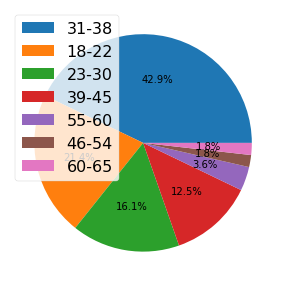

In [38]:
print(survey_data['age'].value_counts(normalize=True))
labels = survey_data['age'].drop_duplicates()
ax = survey_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plot.legend(labels=labels)
ax.set_ylabel(None) 
plot.savefig('age.png', bbox_inches='tight')


Millennials    0.642857
GenZ           0.160714
GenX           0.142857
Boomers        0.053571
Name: age_category, dtype: float64


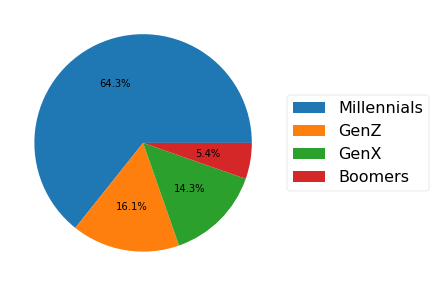

In [39]:
print(survey_data['age_category'].value_counts(normalize=True))

labels = survey_data['age_category'].drop_duplicates()
ax = survey_data['age_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
ax.set_ylabel(None) 
plot.legend(labels=labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
plot.savefig('age_category.png', bbox_inches='tight')


In [40]:
#print(survey_data.head(5))
df = survey_data

## Evaluation of responses and plotting key metrics
Split the responses by delimiter ';' if it is multiple options based <br>
Get the proportions of the responses by 'Age' <br>
Combine all the age specific dataframes into a single one 'xxx_survey_summary' <br>
Create a bar plot on the responses w.r.t Age <br>

## What do you believe mobile wallets could replace in the future?
#### Replacement options provided in the survey : 
* Debit Cards
* Credit Cards
* Cash
* Passports
* Driver License

In [41]:
#column3_long_list = df['replace'].str.split(';', expand=True)

column3_long_list = pd.concat([df[['age_category']], df['replace'].str.split(';', expand=True)], axis=1)
#print(column3_long_list)


# df.loc[df['A'] == 'foo']

response_boomers_replace = column3_long_list \
                            .loc[column3_long_list['age_category'] == 'Boomers'] \
                            .loc[:, column3_long_list.columns != 'age_category']
response_millennials_replace = column3_long_list \
                            .loc[column3_long_list['age_category'] == 'Millennials'] \
                            .loc[:, column3_long_list.columns != 'age_category']
response_genZ_replace = column3_long_list \
                            .loc[column3_long_list['age_category'] == 'GenZ'] \
                            .loc[:, column3_long_list.columns != 'age_category']
response_genX_replace = column3_long_list \
                            .loc[column3_long_list['age_category'] == 'GenX'] \
                            .loc[:, column3_long_list.columns != 'age_category']

print('response_boomers_replace: ', len(response_boomers_replace))
print('response_millennials_replace: ', len(response_millennials_replace))
print('response_genZ_replace: ', len(response_genZ_replace))
print('response_genX_replace: ', len(response_genX_replace), '\n')

summary_boomers_replace = pd.DataFrame(response_boomers_replace.stack().value_counts(normalize=True))
summary_millennials_replace = pd.DataFrame(response_millennials_replace.stack().value_counts(normalize=True))
summary_genZ_replace = pd.DataFrame(response_genZ_replace.stack().value_counts(normalize=True))
summary_genX_replace = pd.DataFrame(response_genX_replace.stack().value_counts(normalize=True))

summary_boomers_replace.insert(loc=0, column='type', value=summary_boomers_replace.index)
summary_millennials_replace.insert(loc=0, column='type', value=summary_millennials_replace.index)
summary_genZ_replace.insert(loc=0, column='type', value=summary_genZ_replace.index)
summary_genX_replace.insert(loc=0, column='type', value=summary_genX_replace.index)

response_boomers_replace:  3
response_millennials_replace:  36
response_genZ_replace:  9
response_genX_replace:  8 



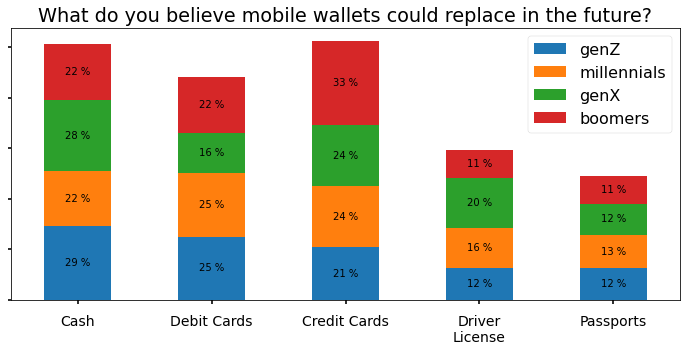

In [52]:
dfs_to_join = [summary_genZ_replace, summary_millennials_replace, summary_genX_replace, summary_boomers_replace]
replace_survey_summary = reduce(lambda left,right: pd.merge(left,right,on='type'), \
                                dfs_to_join)

replace_survey_summary.columns = ['replace_type', 'genZ', 'millennials', 'genX', 'boomers']
#print(replace_survey_summary)
replace_survey_summary['replace_type'] = ['\n'.join(wrap(x, 12)) for x in  replace_survey_summary['replace_type']]

ax = replace_survey_summary.plot(x='replace_type', \
                            kind='bar', \
                            stacked=True,\
                            title='What do you believe mobile wallets could replace in the future?', \
                            mark_right=True)
ax.set(xlabel=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if(width == 0):
        continue
    #print(width, height)
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height*100), 
            ha='center', 
            va='center')
    
ax.set_yticklabels([])
plot.xticks(fontsize=14, rotation=0)
plot.savefig('replace.png', bbox_inches='tight')

## What concerns you about Mobile Payments ?
#### Concerns options provided in the survey : 
* Setup & Ease of Use
* Identity Protection
* Card Security
* Transaction Security
* Cash Transaction Traceability
* Fraudulent Payments
* Merchant Acceptance
* None of the above

In [43]:
column5_long_list = pd.concat([df[['age_category']], df['concerns'].str.split(';', expand=True)], axis=1)
#print(column5_long_list)

response_boomers_concerns = column5_long_list \
                            .loc[column5_long_list['age_category'] == 'Boomers'] \
                            .loc[:, column5_long_list.columns != 'age_category']
response_millennials_concerns = column5_long_list \
                            .loc[column5_long_list['age_category'] == 'Millennials'] \
                            .loc[:, column5_long_list.columns != 'age_category']
response_genZ_concerns = column5_long_list \
                            .loc[column5_long_list['age_category'] == 'GenZ'] \
                            .loc[:, column5_long_list.columns != 'age_category']
response_genX_concerns = column5_long_list \
                            .loc[column5_long_list['age_category'] == 'GenX'] \
                            .loc[:, column5_long_list.columns != 'age_category']

print('response_boomers_concerns: ', len(response_boomers_concerns))
print('response_millennials_concerns: ', len(response_millennials_concerns))
print('response_genZ_concerns: ', len(response_genZ_concerns))
print('response_genX_concerns: ', len(response_genX_concerns), '\n')

summary_boomers_concerns = pd.DataFrame(response_boomers_concerns.stack().value_counts(normalize=True))
summary_millennials_concerns = pd.DataFrame(response_millennials_concerns.stack().value_counts(normalize=True))
summary_genZ_concerns = pd.DataFrame(response_genZ_concerns.stack().value_counts(normalize=True))
summary_genX_concerns = pd.DataFrame(response_genX_concerns.stack().value_counts(normalize=True))

summary_boomers_concerns.insert(loc=0, column='type', value=summary_boomers_concerns.index)
summary_millennials_concerns.insert(loc=0, column='type', value=summary_millennials_concerns.index)
summary_genZ_concerns.insert(loc=0, column='type', value=summary_genZ_concerns.index)
summary_genX_concerns.insert(loc=0, column='type', value=summary_genX_concerns.index)

# print('summary_boomers_concerns:\n', summary_boomers_concerns, '\n')
# print('summary_millennials_concerns:\n', summary_millennials_concerns, '\n')
# print('summary_genZ_concerns:\n', summary_genZ_concerns, '\n')
# print('summary_genX_concerns:\n', summary_genX_concerns, '\n')


response_boomers_concerns:  3
response_millennials_concerns:  36
response_genZ_concerns:  9
response_genX_concerns:  8 



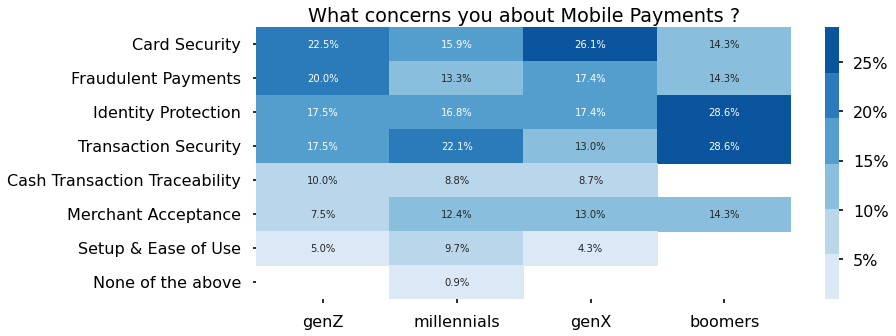

In [44]:
dfs_to_join = [summary_genZ_concerns, summary_millennials_concerns, summary_genX_concerns, summary_boomers_concerns]
concerns_survey_summary = reduce(lambda  left, right: left.merge(right, how='outer', on='type'), dfs_to_join)

concerns_survey_summary.columns = ['concerns_type', 'genZ', 'millennials', 'genX', 'boomers']
#print(concerns_survey_summary)

concerns_survey_summary = concerns_survey_summary. set_index ('concerns_type', drop = False )
fig, ax = plot.subplots(1, 1, figsize = (12, 5))
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(concerns_survey_summary.loc[:, concerns_survey_summary.columns != 'concerns_type'], \
            annot=True,\
            fmt = '.1%',\
            cbar_kws={'format': mtick.FuncFormatter(fmt)},\
            cmap = sns.color_palette("Blues"))
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel(None)  
ax.set_title('What concerns you about Mobile Payments ?')
plot.savefig('concerns.png', bbox_inches='tight')



## How do you use Mobile Payments ?
#### Usage options provided in the survey : 
* Identity Verification (for DL or other ID)
* Send Cash
* Mobile App Payments
* Merchant Transactions (in store)
* Online Payment Transactions
* None of the above

In [45]:
column6_long_list = pd.concat([df[['age_category']], df['usage'].str.split(';', expand=True)], axis=1)
#print(column6_long_list)

response_boomers_usage = column6_long_list \
                            .loc[column6_long_list['age_category'] == 'Boomers'] \
                            .loc[:, column6_long_list.columns != 'age_category']
response_millennials_usage = column6_long_list \
                            .loc[column6_long_list['age_category'] == 'Millennials'] \
                            .loc[:, column6_long_list.columns != 'age_category']
response_genZ_usage = column6_long_list \
                            .loc[column6_long_list['age_category'] == 'GenZ'] \
                            .loc[:, column6_long_list.columns != 'age_category']
response_genX_usage = column6_long_list \
                            .loc[column6_long_list['age_category'] == 'GenX'] \
                            .loc[:, column6_long_list.columns != 'age_category']

print('response_boomers_usage: ', len(response_boomers_usage))
print('response_millennials_usage: ', len(response_millennials_usage))
print('response_genZ_usage: ', len(response_genZ_usage))
print('response_genX_usage: ', len(response_genX_usage), '\n')

summary_boomers_usage = pd.DataFrame(response_boomers_usage.stack().value_counts(normalize=True))
summary_millennials_usage = pd.DataFrame(response_millennials_usage.stack().value_counts(normalize=True))
summary_genZ_usage = pd.DataFrame(response_genZ_usage.stack().value_counts(normalize=True))
summary_genX_usage = pd.DataFrame(response_genX_usage.stack().value_counts(normalize=True))

summary_boomers_usage.insert(loc=0, column='type', value=summary_boomers_usage.index)
summary_millennials_usage.insert(loc=0, column='type', value=summary_millennials_usage.index)
summary_genZ_usage.insert(loc=0, column='type', value=summary_genZ_usage.index)
summary_genX_usage.insert(loc=0, column='type', value=summary_genX_usage.index)

response_boomers_usage:  3
response_millennials_usage:  36
response_genZ_usage:  9
response_genX_usage:  8 



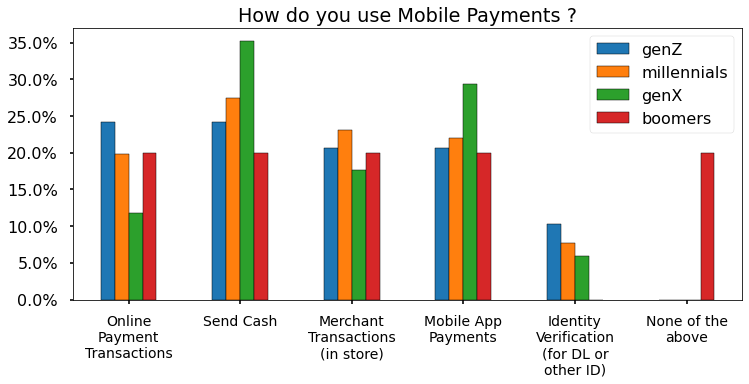

In [50]:
dfs_to_join = [summary_genZ_usage, summary_millennials_usage, summary_genX_usage, summary_boomers_usage]
usage_survey_summary = reduce(lambda  left, right: left.merge(right, how='outer', on='type'), dfs_to_join)

usage_survey_summary.columns = ['usage_type', 'genZ', 'millennials', 'genX', 'boomers']
#print(usage_survey_summary)

usage_survey_summary['usage_type'] = ['\n'.join(wrap(x, 12)) for x in  usage_survey_summary['usage_type']]
                  
ax = usage_survey_summary.plot(x='usage_type', \
                            kind='bar', \
                            # cmap='rocket', \
                            # stacked=True,\
                            edgecolor='black',\
                            title='How do you use Mobile Payments ?', \
                            mark_right=True)
ax.set(xlabel=None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%'))

ax.set(ylabel=None)
plot.xticks(fontsize=14, rotation=0)



#ax.xaxis.label.set_size(5)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%'))
plot.savefig('usage.png', bbox_inches='tight')
